In [2]:
import sys
import h5py as h5
import numpy as np
import torch as T
import matplotlib.pyplot as plt

In [3]:
folder = './test/'

In [4]:
# center beam
f_center = folder + 'data_Rx_dx0_dy0_dz600.h5'
M_0 = h5.File(f_center,'r+')
M_21_0 = M_0['M21_real'][:] + 1j*M_0['M21_imag'][:]
data = np.abs(M_21_0)
M_3_0 = M_0['M3_real'][:] + 1j*M_0['M3_imag'][:]
data3 = np.abs(M_3_0)

In [4]:
#plt.hist(data[::10,::10],bins=101)

In [4]:
u,s,v = np.linalg.svd(M_21_0,full_matrices = True)

In [ ]:
print(u.shape,v.shape)
print(s.size,s.shape)

(13013, 13013) (15525, 15525)


In [5]:
u2,s2,v2 = np.linalg.svd(M_3_0,full_matrices = True)

In [9]:
M_3_0.shape

(961, 13013)

In [ ]:
vmax = np.log10(data.max())*20
vmin = vmax - 60
plt.pcolor(np.log10(np.abs(u2[::20,::20]))*20,vmin=vmin,vmax=vmax,cmap = 'jet')
plt.colorbar()

(13013,)

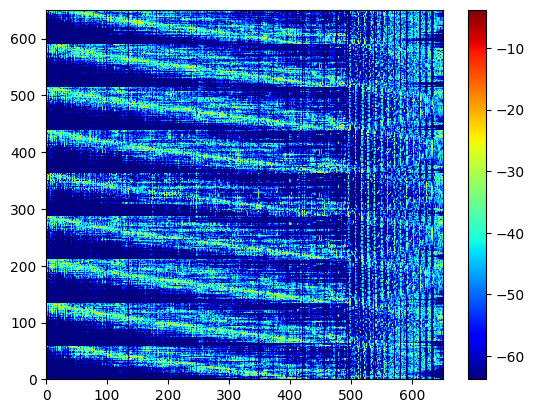

In [15]:
vmax = np.log10(data.max())*20
vmin = vmax - 60
plt.pcolor(np.log10(np.abs(u[::20,::20]))*20,vmin=vmin,vmax=vmax,cmap = 'jet')
plt.colorbar()

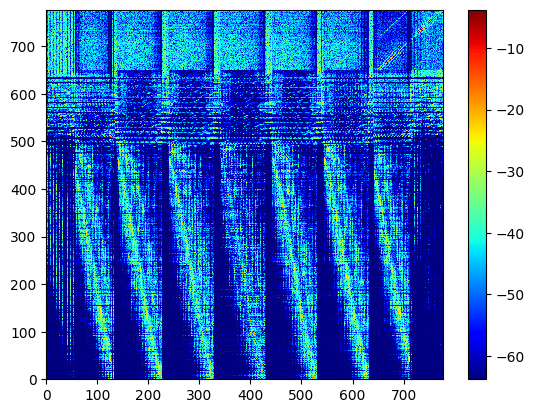

In [16]:
vmax = np.log10(data.max())*20
vmin = vmax - 60
plt.pcolor(np.log10(np.abs(v[::20,::20]))*20,vmin=vmin,vmax=vmax,cmap = 'jet')
plt.colorbar()

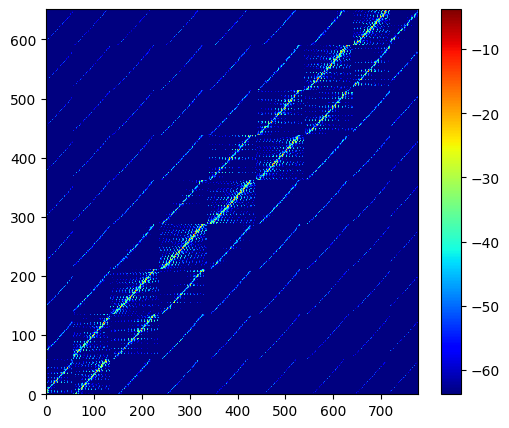

In [4]:
vmax = np.log10(data.max())*20
vmin = vmax - 60
figure = plt.figure(figsize = (6,5))
plt.pcolor(np.log10(data[::20,::20])*20,vmin=vmin,vmax=vmax,cmap = 'jet')
plt.colorbar()

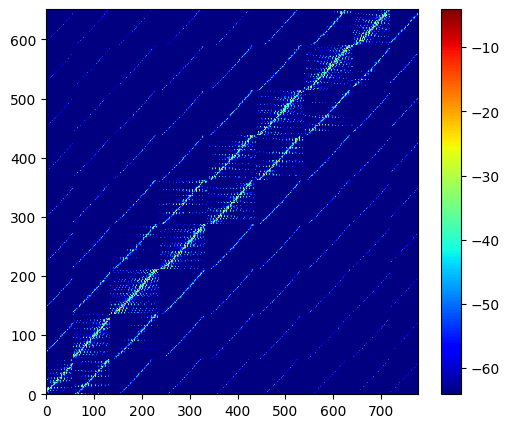

In [6]:
vmax = np.log10(data.max())*20
vmin = vmax - 60
figure = plt.figure(figsize = (6,5))
plt.pcolor(np.log10(data[::20,::20])*20,vmin=vmin,vmax=vmax,cmap = 'jet')
plt.colorbar()

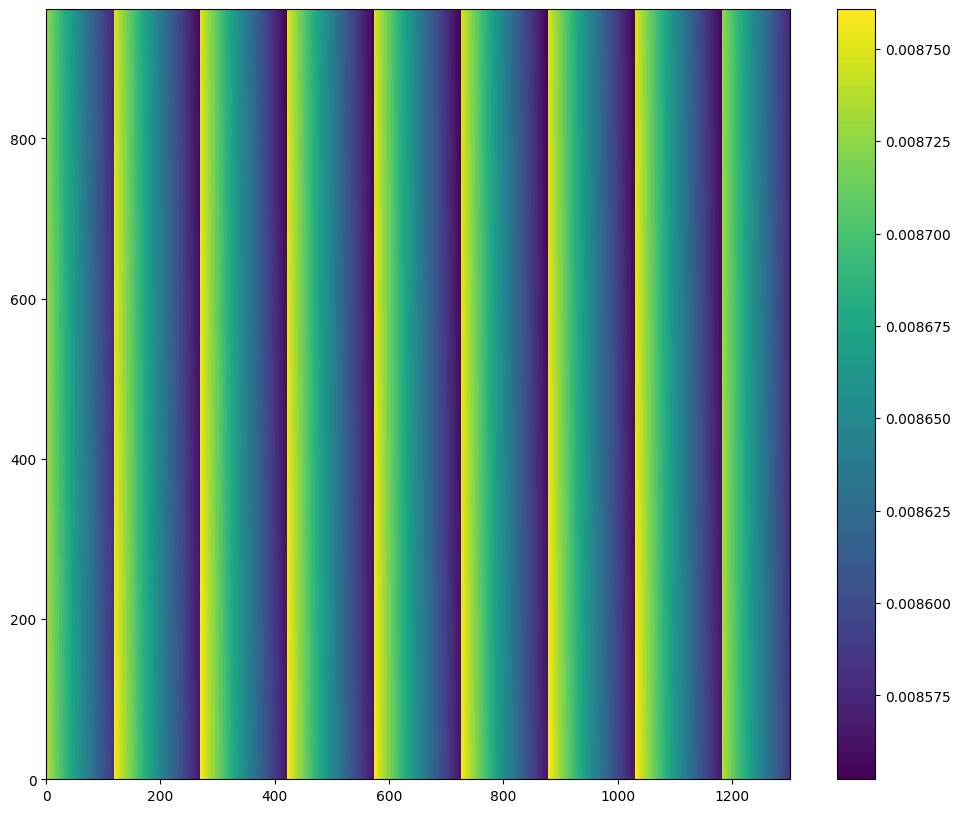

In [5]:
vmax = np.log10(data3.max())*20
vmin = vmax - 40
figure = plt.figure(figsize = (12,10))
plt.pcolor(np.abs(M_3_0[:,::10]))#,vmin=vmin,vmax=vmax,cmap = 'jet')
plt.colorbar()

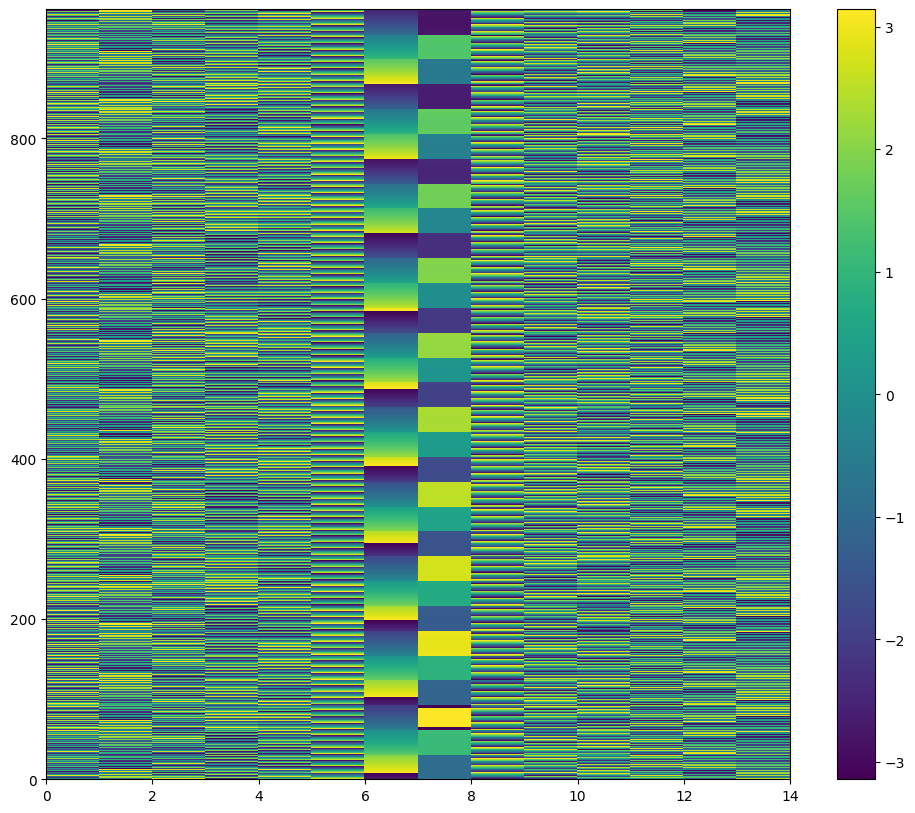

In [19]:
vmax = np.log10(data3.max())*20
vmin = vmax - 40
figure = plt.figure(figsize = (12,10))
plt.pcolor(np.angle(M_3_0[:,::1000]))#,vmin=vmin,vmax=vmax,cmap = 'jet')
plt.colorbar()

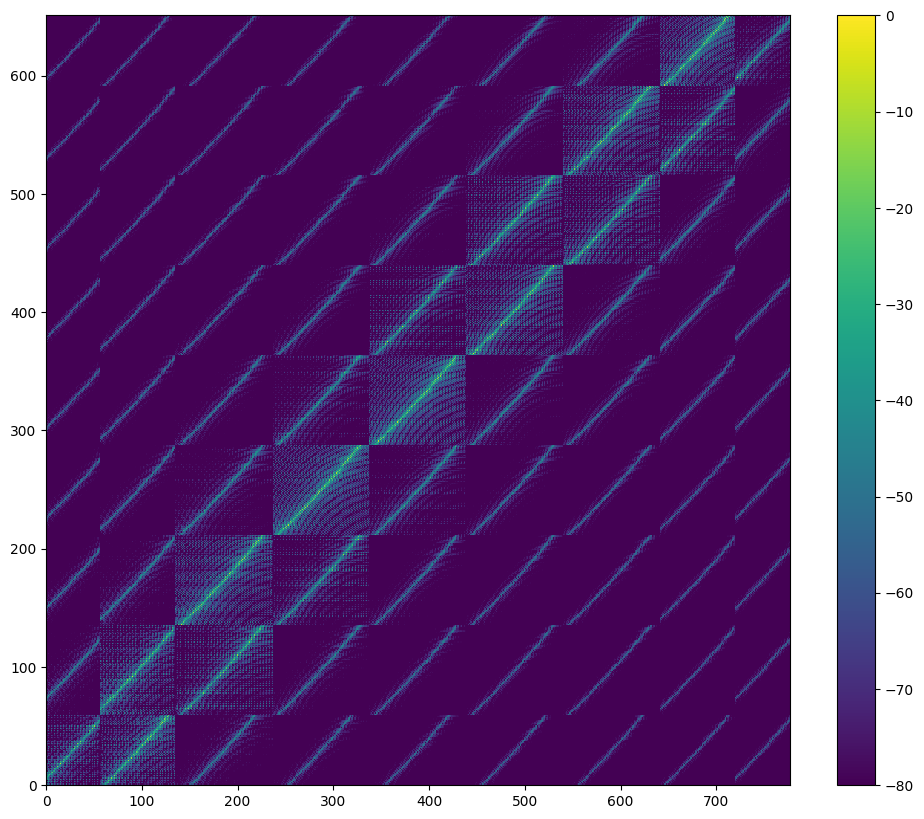

In [6]:
figure = plt.figure(figsize = (12,10))
plt.pcolor(np.log10(np.abs(M_21_0[::20,::20]))*20,vmin=-80,vmax=0)
plt.colorbar()


In [ ]:
NN = np.where(data<(data.max()*10**(-3)))
(data[NN]**2).sum()/(data**2).sum()

In [ ]:
NN[0].size/data.size

In [ ]:
b = T.tensor(M_21_0)

In [ ]:
b=b.to('cuda:0')

In [ ]:
M_21_0[NN] = 0

In [ ]:
c = T.tensor(M_21_0).to_sparse()

In [ ]:
c = c.to('cuda:0')

In [ ]:
c.values().numel()*c.values().element_size()/1024/1024

In [ ]:
c.indices().numel()*c.indices().element_size()/1024/1024

In [ ]:
c.values().real

In [ ]:
c.indices()

In [ ]:
f2 = T.ones((15525,1),dtype  = T.complex128).to('cuda:0')


In [ ]:
for n in range(2000):
    beam1 = T.mm(b,f2)

In [ ]:
for n in range(10000):
    beam2 = T.mm(c,f2)

In [ ]:
err = beam1 - beam2

In [ ]:
(T.abs(err)**2).sum()

In [ ]:
(T.abs(err)**2).sum()/(T.abs(beam1)**2).sum()

In [ ]:
plt.plot(err.cpu().numpy())

In [ ]:
import numpy as np

In [ ]:
Gain = np.array([72.715885,72.711361,72.706706]) #dB

In [ ]:
power = 10**(Gain/10)

In [ ]:
print(np.abs(power[1]-power[0])/power[0]*100)
print(np.abs(power[2]-power[0])/power[0]*100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate DFT matrix
def dft_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)  # DFT matrix
    return W

# Set matrix size
N = 16  # You can change this to a larger value for better visualization

# Compute DFT matrix
W = dft_matrix(N)

# Plot real part
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolor(np.real(W), cmap='coolwarm', shading='auto')
plt.colorbar(label="Real Part")
plt.title("Real Part of DFT Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

# Plot imaginary part
plt.subplot(1, 2, 2)
plt.pcolor(np.imag(W), cmap='coolwarm', shading='auto')
plt.colorbar(label="Imaginary Part")
plt.title("Imaginary Part of DFT Matrix")
plt.xlabel("Column Index")
plt.ylabel("Row Index")

plt.tight_layout()
plt.show()
